In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import cmocean as cm
from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44391,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:33803,Total threads: 4
Dashboard: /proxy/38643/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:36405,


In [3]:
session = cc.database.create_session()
control = '01deg_jra55v13_ryf9091'

## Load topo from RYF, and snapshots of SST, SSH

In [4]:
ht = cc.querying.getvar(control,'ht',session,n=1).sel(yt_ocean=slice(-66,-29)).roll(xt_ocean=800,roll_coords=True).rolling({'yt_ocean':10,'xt_ocean':10},center=True).mean()
ht.xt_ocean.values[800:] = ht.xt_ocean.values[800:]+360
ht.load()

<xarray.DataArray 'ht' (yt_ocean: 584, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.6 359.7 359.8 359.9
  * yt_ocean  (yt_ocean) float64 -65.99 -65.94 -65.9 ... -29.2 -29.11 -29.02
    geolon_t  (yt_ocean, xt_ocean) float32 0.05 0.15 0.25 ... -0.25 -0.15 -0.05
    geolat_t  (yt_ocean, xt_ocean) float32 -65.99 -65.99 ... -29.02 -29.02
Attributes:
    long_name:      ocean depth on t-cells
    units:          m
    valid_range:    [-1.e+09  1.e+09]
    cell_methods:   time: point
    standard_name:  sea_floor_depth_below_geoid
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf90...
    contact:        Andy Hogg
    email:          andy.hogg@anu.edu.au
    created:        2020-06-11
    description:    0.1 degree ACCESS-OM2 global model configuration under th...
    notes:          Additional daily outputs saved from 1 Jan 1950 to 31 Dec ...

In [5]:
SST_snapshot = cc.querying.getvar('01deg_jra55v140_iaf_cycle3_HF','surface_pot_temp',session,n=1).isel(time=-1).sel(yt_ocean=slice(-66,-29)).roll(xt_ocean=800,roll_coords=True)
SST_snapshot.xt_ocean.values[800:] = SST_snapshot.xt_ocean.values[800:]+360
SST_snapshot.load()

<xarray.DataArray 'surface_pot_temp' (yt_ocean: 584, xt_ocean: 3600)>
array([[272.46597, 272.4735 , 272.46542, ..., 272.37964, 272.42038,
        272.4467 ],
       [272.45837, 272.4612 , 272.45865, ..., 272.38077, 272.4169 ,
        272.43994],
       [272.4415 , 272.44653, 272.45267, ..., 272.38907, 272.41095,
        272.42474],
       ...,
       [295.7561 , 295.72244, 295.69943, ..., 295.81403, 295.80478,
        295.77136],
       [295.76306, 295.7601 , 295.73697, ..., 295.79166, 295.77414,
        295.76892],
       [295.76398, 295.76486, 295.76517, ..., 295.7942 , 295.7725 ,
        295.76636]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.6 359.7 359.8 359.9
  * yt_ocean  (yt_ocean) float64 -65.99 -65.94 -65.9 ... -29.2 -29.11 -29.02
    time      datetime64[ns] 2012-03-31T22:30:00
Attributes:
    long_name:      Potential temperature
    units:          K
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_surface_temperature
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

In [6]:
SSH_snapshot = cc.querying.getvar('01deg_jra55v140_iaf_cycle3_HF','sea_level',session,n=1).isel(time=-1).sel(yt_ocean=slice(-66,-29)).roll(xt_ocean=800,roll_coords=True)
SSH_snapshot.xt_ocean.values[800:] = SSH_snapshot.xt_ocean.values[800:]+360
SSH_snapshot.load()

<xarray.DataArray 'sea_level' (yt_ocean: 584, xt_ocean: 3600)>
array([[-1.7575576 , -1.7587692 , -1.7595439 , ..., -1.7535222 ,
        -1.754774  , -1.756212  ],
       [-1.7570733 , -1.758192  , -1.7591292 , ..., -1.753306  ,
        -1.7545489 , -1.7557522 ],
       [-1.7564237 , -1.7575493 , -1.7583393 , ..., -1.7531846 ,
        -1.7541552 , -1.7552907 ],
       ...,
       [ 0.02046236,  0.02054223,  0.02035495, ...,  0.02152189,
         0.02130955,  0.02068493],
       [ 0.01784661,  0.01821557,  0.01820785, ...,  0.0184297 ,
         0.01800594,  0.0177609 ],
       [ 0.01515462,  0.01572943,  0.01619562, ...,  0.01522609,
         0.01486497,  0.01477907]], dtype=float32)
Coordinates:
  * xt_ocean  (xt_ocean) float64 0.05 0.15 0.25 0.35 ... 359.6 359.7 359.8 359.9
  * yt_ocean  (yt_ocean) float64 -65.99 -65.94 -65.9 ... -29.2 -29.11 -29.02
    time      datetime64[ns] 2012-03-31T22:30:00
Attributes:
    long_name:      effective sea level (eta_t + patm/(rho0*g)) on T cells
    units:          meter
    valid_range:    [-1000.  1000.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_surface_height_above_geoid
    ncfiles:        ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v140_iaf_...
    contact:        Andrew Kiss
    email:          andrew.kiss@anu.edu.au
    created:        2020-11-11
    description:    0.1 degree ACCESS-OM2 global model configuration under in...
    notes:          Run configuration and history: https://github.com/COSIMA/...

## Load Claire's Honours data for EKE

In [7]:
path = '/g/data/x77/cy8964/Honours-Paper_Data/'
EKE = (xr.open_dataset(path+'EKE_10yr.nc').EKE/1e6).sum('isopycnal_bins').load()

## Plot Kerguelen region
Note that I still need to load some of Claire's flux data as I go.

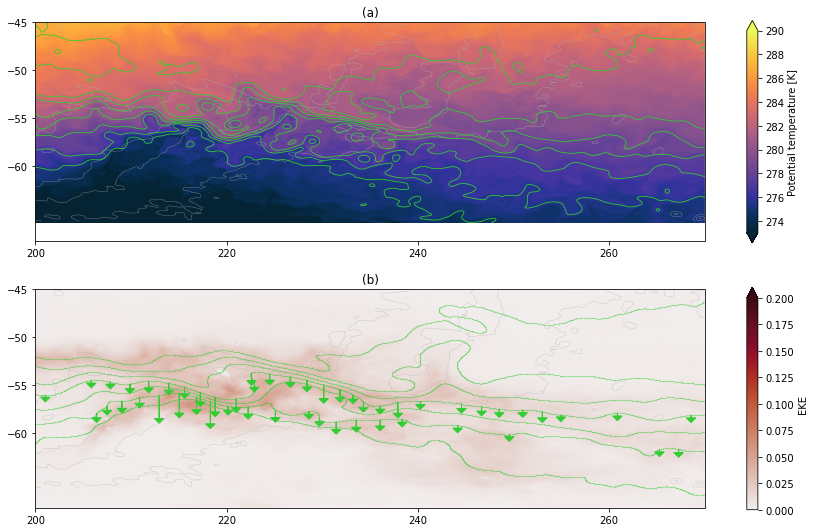

In [12]:
fig  = plt.figure(1, figsize = (15,9))
ax1 = plt.subplot(2,1,1,projection=ccrs.PlateCarree(central_longitude=235))
ax1.coastlines(resolution='50m')
ax1.set_extent([200, 270, -64, -45])
SST_snapshot.plot(ax=ax1,vmin=273,vmax=290,cmap = cm.cm.thermal,transform=ccrs.PlateCarree())
ht.plot.contour(ax=ax1,levels=[1000,2000,3000,4000],colors=[0.7],linewidths=0.4,transform=ccrs.PlateCarree())
SSH_snapshot.plot.contour(ax=ax1,levels=[-1.3,-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1],colors="limegreen",linestyles='-',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.set_xticks([200, 220, 240,260], crs=ccrs.PlateCarree())   
ax1.set_xticklabels([200, 220, 240,260])
ax1.xaxis.label.set_visible(False)
ax1.set_yticks([-60,-55, -50, -45], crs=ccrs.PlateCarree())   
ax1.yaxis.label.set_visible(False)
ax1.set_title('(a)')

ax2 = plt.subplot(2,1,2,projection=ccrs.PlateCarree(central_longitude=235))
ax2.coastlines(resolution='50m')
ax2.set_extent([200, 270, -64, -45])
EKE.plot(ax=ax2,cmap=cm.cm.amp,vmax=0.2,transform=ccrs.PlateCarree())
ht.plot.contour(ax=ax2,levels=[1000,2000,3000,4000],colors=[0.7],linewidths=0.4,transform=ccrs.PlateCarree())
ax2.set_xticks([200, 220, 240,260], crs=ccrs.PlateCarree())   
ax2.set_xticklabels([200, 220, 240,260])
ax2.xaxis.label.set_visible(False)
ax2.set_yticks([-60, -55, -50, -45], crs=ccrs.PlateCarree())   
ax2.yaxis.label.set_visible(False)
ax2.set_title('(b)')

# plot every second contour
for j in np.arange(0,14,2):
    i = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N'][j]
    SSH = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4][j]
    outfile = path+'SO_'+i+'_latlon.nc'
    lat_along_contour = xr.open_dataset(outfile).lat_along_contour
    lon_along_contour = xr.open_dataset(outfile).lon_along_contour
    ax2.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s = 0.02, color = 'limegreen', transform=ccrs.PlateCarree())

j_contour='G'
rhoslice = slice(1032.2,1032.5)
lat_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lat_along_contour
lon_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lon_along_contour
segment_length = xr.open_dataset(path+'SO_'+j_contour+'_segment_length'+'.nc').segment_length
vh_eddy = xr.open_dataset(path+'vh_eddy_SO_'+j_contour+'.nc').vh_eddy.sel(isopycnal_bins=rhoslice).sum('isopycnal_bins').rolling(contour_index=20,center=True).mean()/segment_length
for i in np.arange(10,len(lon_along_contour),25):
    if np.abs(vh_eddy[i]) >0.2:
        ax2.arrow(lon_along_contour[i],lat_along_contour[i],vh_eddy[i]*0,vh_eddy[i],head_length = 0.5,head_width = 1,length_includes_head=False, color = 'limegreen',transform=ccrs.PlateCarree())#, head_length = 0.1,length_includes_head=True)

    
j_contour='K'
rhoslice = slice(1032.2,1032.5)
lat_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lat_along_contour
lon_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lon_along_contour
segment_length = xr.open_dataset(path+'SO_'+j_contour+'_segment_length'+'.nc').segment_length
vh_eddy = xr.open_dataset(path+'vh_eddy_SO_'+j_contour+'.nc').vh_eddy.sel(isopycnal_bins=rhoslice).sum('isopycnal_bins').rolling(contour_index=20,center=True).mean()/segment_length
for i in np.arange(10,len(lon_along_contour),25):
    if np.abs(vh_eddy[i]) >0.2:
        ax2.arrow(lon_along_contour[i],lat_along_contour[i],vh_eddy[i]*0,vh_eddy[i],head_length = 0.5,head_width = 1,length_includes_head=False, color = 'limegreen',transform=ccrs.PlateCarree())#, head_length = 0.1,length_includes_head=True)


plt.savefig('temp.png',dpi=300)

## Plot Kerguelen region


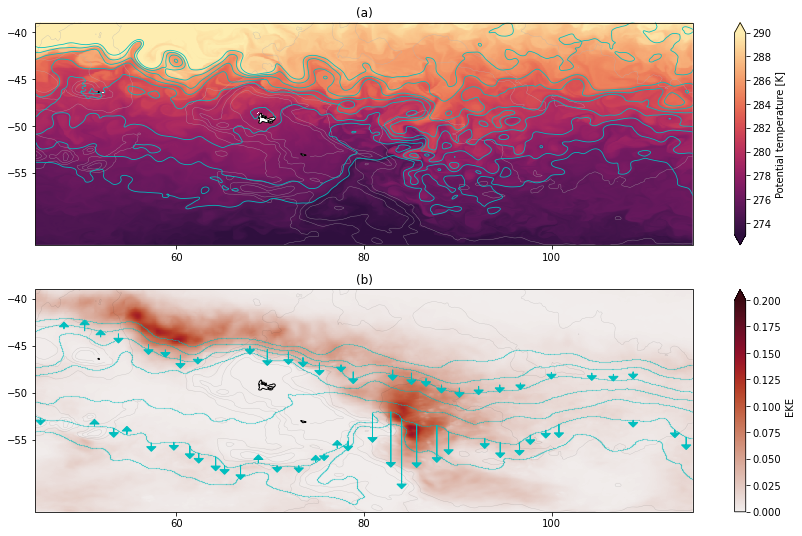

In [24]:
fig  = plt.figure(1, figsize = (15,9))
ax1 = plt.subplot(2,1,1,projection=ccrs.PlateCarree(central_longitude=80))
ax1.coastlines(resolution='50m')
ax1.set_extent([45, 115, -58, -39])
SST_snapshot.plot(ax=ax1,vmin=273,vmax=290,cmap = cm.cm.matter_r,transform=ccrs.PlateCarree())
ht.plot.contour(ax=ax1,levels=[1000,2000,3000,4000],colors=[0.7],linewidths=0.4,transform=ccrs.PlateCarree())
SSH_snapshot.plot.contour(ax=ax1,levels=[-1.3,-1.1,-0.9,-0.7,-0.5,-0.3,-0.1,0.1],colors='c',linestyles='-',linewidths=0.8,transform=ccrs.PlateCarree())
ax1.set_xticks([60, 80, 100], crs=ccrs.PlateCarree())   
ax1.set_xticklabels([60, 80, 100])
ax1.xaxis.label.set_visible(False)
ax1.set_yticks([-55, -50, -45,-40], crs=ccrs.PlateCarree())   
ax1.yaxis.label.set_visible(False)
ax1.set_title('(a)')

ax2 = plt.subplot(2,1,2,projection=ccrs.PlateCarree(central_longitude=80))
ax2.coastlines(resolution='50m')
ax2.set_extent([45, 115, -58, -39])
EKE.plot(ax=ax2,cmap=cm.cm.amp,vmax=0.2,transform=ccrs.PlateCarree())
ht.plot.contour(ax=ax2,levels=[1000,2000,3000,4000],colors=[0.2],linewidths=0.4,transform=ccrs.PlateCarree())
ax2.set_xticks([60, 80, 100], crs=ccrs.PlateCarree())   
ax2.set_xticklabels([60, 80, 100])
ax2.xaxis.label.set_visible(False)
ax2.set_yticks([-55, -50, -45,-40], crs=ccrs.PlateCarree())   
ax2.yaxis.label.set_visible(False)
ax2.set_title('(b)')

# plot every second contour
for j in np.arange(1,14,2):
    i = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N'][j]
    SSH = [-0.1,-0.2,-0.3,-0.4,-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4][j]
    outfile = path+'SO_'+i+'_latlon.nc'
    lat_along_contour = xr.open_dataset(outfile).lat_along_contour
    lon_along_contour = xr.open_dataset(outfile).lon_along_contour
    ax2.scatter(lon_along_contour,lat_along_contour,label = str(SSH),s=0.02, color = 'c', transform=ccrs.PlateCarree())

j_contour='E'
rhoslice = slice(1032.2,1032.5)
lat_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lat_along_contour
lon_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lon_along_contour
segment_length = xr.open_dataset(path+'SO_'+j_contour+'_segment_length'+'.nc').segment_length
vh_eddy = xr.open_dataset(path+'vh_eddy_SO_'+j_contour+'.nc').vh_eddy.sel(isopycnal_bins=rhoslice).sum('isopycnal_bins').rolling(contour_index=10,center=True).mean()/segment_length
for i in np.arange(10,len(lon_along_contour),25):
    if np.abs(vh_eddy[i]) >0.2:
        ax2.arrow(lon_along_contour[i],lat_along_contour[i],vh_eddy[i]*0,vh_eddy[i],head_length = 0.5,head_width = 1,length_includes_head=False, color = 'c',transform=ccrs.PlateCarree())#, head_length = 0.1,length_includes_head=True)


# This is the -1.2m contour
j_contour='L'
rhoslice = slice(1032.2,1032.5)
lat_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lat_along_contour
lon_along_contour = xr.open_dataset(path+'SO_'+j_contour+'_latlon'+'.nc').lon_along_contour
segment_length = xr.open_dataset(path+'SO_'+j_contour+'_segment_length'+'.nc').segment_length
vh_eddy = xr.open_dataset(path+'vh_eddy_SO_'+j_contour+'.nc').vh_eddy.sel(isopycnal_bins=rhoslice).sum('isopycnal_bins').rolling(contour_index=10,center=True).mean()/segment_length
for i in np.arange(10,len(lon_along_contour),25):
    if np.abs(vh_eddy[i]) >0.2:
        ax2.arrow(lon_along_contour[i],lat_along_contour[i],vh_eddy[i]*0,vh_eddy[i],head_length = 0.5,head_width = 1,length_includes_head=False, color = 'c',transform=ccrs.PlateCarree())#, head_length = 0.1,length_includes_head=True)


plt.savefig('x77/SO-RoG-plots/KerguelenFluxes.png',dpi=300)